In [1]:
%matplotlib inline
import geopandas as gpd
import pandas as pd
import numpy as np
import glob

In [2]:
# df_plus = gpd.read_file('2001_2002_plus.csv', geometry='.geo')
# df_plus.rename({'sum':'lake_growth'}, inplace=True)
# df_minus = gpd.read_file('2001_2002_minus.csv')
# df_minus.rename({'sum':'lake_decline'}, inplace=True)
# df_all = gpd.read_file('2001_2002_all.csv')
# df_all.rename({'sum':'total_pixels'}, inplace=True)


In [3]:
# glob.glob('gsw_reduced/gsw_reduced*/*')
# 'gsw_reduced/gsw_reduced*/*
pluses = glob.glob('gsw_reduced/gsw_reduced*/*_plus.csv')
minuses = glob.glob('gsw_reduced/gsw_reduced*/*_minus.csv')
alles = glob.glob('gsw_reduced/gsw_reduced*/*_all.csv')

In [29]:

df_plus = pd.DataFrame()

for p in pluses:
    df_p = pd.read_csv(p)
    # print(p.split('/'))
    df_p['year'] = p.split('/')[2][0:4]
    df_p['region'] = p.split('/')[1].split('_')[2]
    # print(df_p)
    df_plus = pd.concat([df_plus, df_p])

# TODO: FOR MINUSES

# TODO: FOR ALLES

# TODO: MERGE EVERYONE WITH EVERYTHING

,system:index,COAST,DIST_MAIN,DIST_SINK,ENDO,HYBAS_ID,MAIN_BAS,NEXT_DOWN,NEXT_SINK,ORDER,PFAF_ID,SORT,SUB_AREA,UP_AREA,sum,.geo,year,region
0,00000000000000000868,0,0.0,0.0,2,4060050470,4060050470,0,4060050470,1,491503,2153,29078.1,29078.1,68123.0,"{""type"":""Polygon"",""coordinates"":[[[88.20351145...",2005,3
0,00000000000000000868,0,0.0,0.0,2,4060050470,4060050470,0,4060050470,1,491503,2153,29078.1,29078.1,68123.0,"{""type"":""Polygon"",""coordinates"":[[[88.20351145...",2005,15
0,00000000000000000868,0,0.0,0.0,2,4060050470,4060050470,0,4060050470,1,491503,2153,29078.1,29078.1,68123.0,"{""type"":""Polygon"",""coordinates"":[[[88.20351145...",2005,4
0,00000000000000000868,0,0.0,0.0,2,4060050470,4060050470,0,4060050470,1,491503,2153,29078.1,29078.1,68123.0,"{""type"":""Polygon"",""coordinates"":[[[88.20351145...",2005,5
0,00000000000000000868,0,0.0,0.0,2,4060050470,4060050470,0,4060050470,1,491503,2153,29078.1,29078.1,68123.0,"{""type"":""Polygon"",""coordinates"":[[[88.20351145...",2005,13
0,00000000000000000868,0,0.0,0.0,2,4060050470,4060050470,0,4060050470,1,491503,2153,29078.1,29078.1,68123.0,"{""type"":""Polygon"",""coordinates"":[[[88.20351145...",2005,2
0,00000000000000000868,0,0.0,0.0,2,4060050470,4060050470,0,4060050470,1,491503,2153,29078.1,29078.1,68123.0,"{""type"":""Polygon"",""coordinates"":[[[88.20351145...",2005,14
0,00000000000000000868,0,0.0,0.0,2,4060050470,4060050470,0,4060050470,1,491503,2153,29078.1,29078.1,68123.0,"{""type"":""Polygon"",""coordinates"":[[[88.20351145...",2005,9
0,00000000000000000868,0,0.0,0.0,2,4060050470,4060050470,0,4060050470,1,491503,2153,29078.1,29078.1,68123.0,"{""type"":""Polygon"",""coordinates"":[[[88.20351145...",2005,18
0,00000000000000000868,0,0.0,0.0,2,4060050470,4060050470,0,4060050470,1,491503,2153,29078.1,29078.1,68123.0,"{""type"":""Polygon"",""coordinates"":[[[88.20351145...",2005,7


In [ ]:
df = pd.DataFrame()

for p, m, a in zip(pluses, minuses, alles):
    # print(p, m, a)
    df_plus = pd.read_csv(p)
    df_minus = pd.read_csv(m)
    df_all = pd.read_csv(a)
    
    df_year = df_plus.merge(df_minus, on = 'HYBAS_ID').merge(df_all, on='HYBAS_ID')[['HYBAS_ID', 'sum_x', 'sum_y', 'sum']]
    # df_year['year'] = p.split('_')
    df_year['year'] = p.split('/')[2][0:4]
    # print(p)
    # print(p.split('_'))
    # df_year['region_n'] = p.split('_')[3].split('/')[0]
    # print(p.split('/')[1].split('_')[2])
    df_year['region'] = p.split('/')[1].split('_')[2]
    df = pd.concat([df, df_year])
    
# df.columns = ['HYBAS_ID', 'lake_growth', 'lake_decline', 'all', 'year']
df.columns = ['HYBAS_ID', 'lake_growth', 'lake_decline', 'all', 'year', 'region']
# print(df.columns)
df['growth_ratio'] = df.lake_growth/df['all']
df['decline_ratio'] = df.lake_decline/df['all']*(-1)
df['year'] = df['year'].astype(int)
df['water_balance'] = (df['lake_growth'] - df['lake_decline'])
df['water_balance_m3'] = df['water_balance'] * 30 / 1e3 * 30 / 1e3
df.sort_values('year', inplace=True)
df.drop_duplicates(inplace=True)
df.head()

In [46]:
df[df.HYBAS_ID==4060050470]

,HYBAS_ID,lake_growth,lake_decline,all,year,region,growth_ratio,decline_ratio,water_balance,water_balance_m3
0,4060050470,131593.043137,-39598.705882,3.822362e+07,2001,1,0.003443,0.001036,171191.749020,154.072574
0,4060050470,131593.043137,-39598.705882,3.822362e+07,2001,14,0.003443,0.001036,171191.749020,154.072574
0,4060050470,132627.027451,-79713.549020,3.822362e+07,2002,14,0.003470,0.002085,212340.576471,191.106519
0,4060050470,132627.027451,-79713.549020,3.822362e+07,2002,10,0.003470,0.002085,212340.576471,191.106519
0,4060050470,132627.027451,-79713.549020,3.822362e+07,2002,13,0.003470,0.002085,212340.576471,191.106519
...,...,...,...,...,...,...,...,...,...,...
0,4060050470,141242.145098,-68044.862745,3.822362e+07,2019,17,0.003695,0.001780,209287.007843,188.358307
0,4060050470,141242.145098,-68044.862745,3.822362e+07,2019,2,0.003695,0.001780,209287.007843,188.358307
0,4060050470,141242.145098,-68044.862745,3.822362e+07,2019,15,0.003695,0.001780,209287.007843,188.358307
0,4060050470,141242.145098,-68044.862745,3.822362e+07,2019,3,0.003695,0.001780,209287.007843,188.358307


In [31]:
df.water_balance_m3.unique()

(857,)

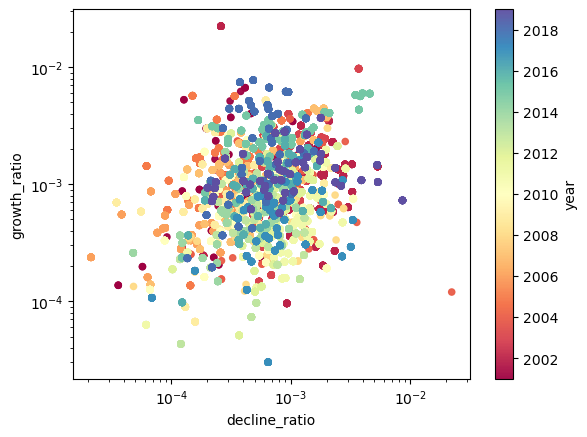

In [26]:
ax = df.plot.scatter('decline_ratio', 'growth_ratio', alpha=0.95, c='year', cmap='Spectral')
ax.set_yscale('log')
ax.set_xscale('log')

<Axes: >

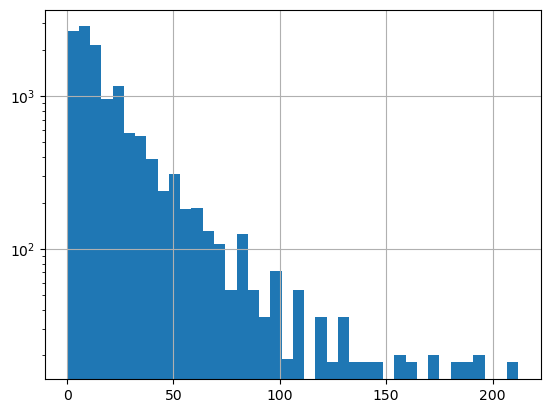

In [27]:
df.water_balance_m3.hist(bins=40, log=True)

In [6]:
df.HYBAS_ID.unique().shape

(45,)

In [7]:
df.year.unique().shape

(19,)

In [8]:
19*45

855

In [9]:
df.to_csv('lake_data.csv')

In [10]:
# df.columns = ['lg', 'ld', 'lall']
# df['lg'] = df.lg.astype(float)
# df['ld'] = df.ld.astype(float)
# df['lall'] = df.lall.astype(float)

# df['lg/lall'] = df.lg/df.lall
# df['ld/lall'] = df.ld/df.lall

In [11]:
# df.plot.scatter(x='ld/lall', y='lg/lall')

In [12]:
# df.ld/df.lall